In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import constants
import matplotlib.pyplot as plt
import numpy as np

In [25]:
import pandas as pd
ds = pd.read_csv('B4R1.csv')

In [26]:
ds.head(20)

,Time,ENSMUST ID,Transcript,Length (bp),Coverage,FPKM
0,0.000,3726,201,5957,0.00000,0.00000
1,0.000,121285,203,5922,29.04920,4.34940
2,0.000,230565,207,747,0.00000,0.00000
3,0.000,229020,206,438,0.00000,0.00000
4,0.000,230858,208,507,0.00000,0.00000
5,0.000,120276,202,4486,12.09280,1.81059
6,0.000,237692,212,1823,0.00000,0.00000
7,0.000,127893,205,1910,0.00000,0.00000
8,0.000,125899,204,2118,0.00000,0.00000
9,0.000,235598,210,1757,0.00000,0.00000


In [27]:
ds.shape

(72, 6)

In [28]:
ds.columns

Index(['Time', 'ENSMUST ID', 'Transcript', 'Length (bp)', 'Coverage', 'FPKM'], dtype='object')

In [29]:
groupby_TS = ds.groupby('Transcript')
for transcript, value in groupby_TS['FPKM']:
    print((transcript, value.median()))

(201, np.float64(0.0))
(202, np.float64(1.49323))
(203, np.float64(4.392060000000001))
(204, np.float64(0.0))
(205, np.float64(3.1753400000000003))
(206, np.float64(0.0))
(207, np.float64(0.0))
(208, np.float64(0.0))
(209, np.float64(0.0))
(210, np.float64(0.0))
(211, np.float64(0.0))
(212, np.float64(0.0))


In [30]:
groupby_TS = ds.groupby('Transcript')
for transcript, value in groupby_TS['Coverage']:
    print((transcript, value.median()))

(201, np.float64(0.0))
(202, np.float64(10.3706))
(203, np.float64(28.62465))
(204, np.float64(0.0))
(205, np.float64(22.924149999999997))
(206, np.float64(0.0))
(207, np.float64(0.0))
(208, np.float64(0.0))
(209, np.float64(0.0))
(210, np.float64(0.0))
(211, np.float64(0.0))
(212, np.float64(0.0))


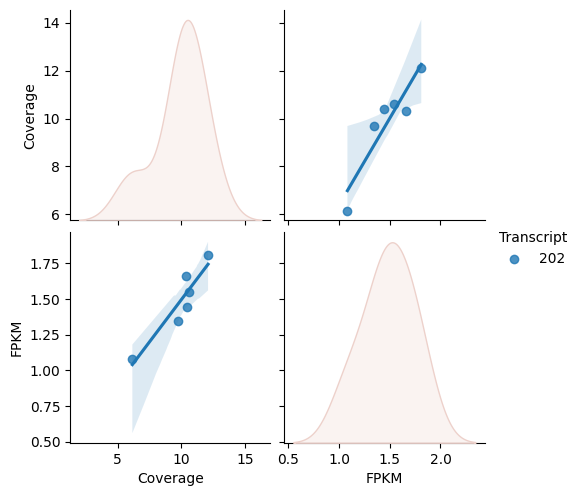

In [31]:
sns.pairplot(ds[ds['Transcript'] == 202], vars=['Coverage', 'FPKM'],
                 kind='reg', hue='Transcript') 

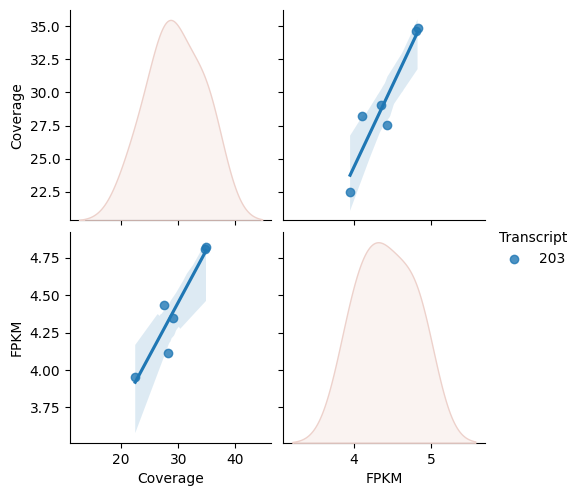

In [32]:
sns.pairplot(ds[ds['Transcript'] == 203], vars=['Coverage', 'FPKM'],
                 kind='reg', hue='Transcript') 

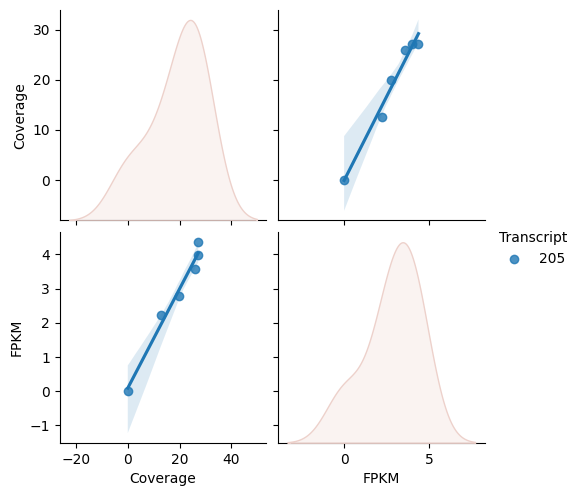

In [33]:
sns.pairplot(ds[ds['Transcript'] == 205], vars=['Coverage', 'FPKM'],
                 kind='reg', hue='Transcript') 

<Axes: xlabel='FPKM', ylabel='Density'>

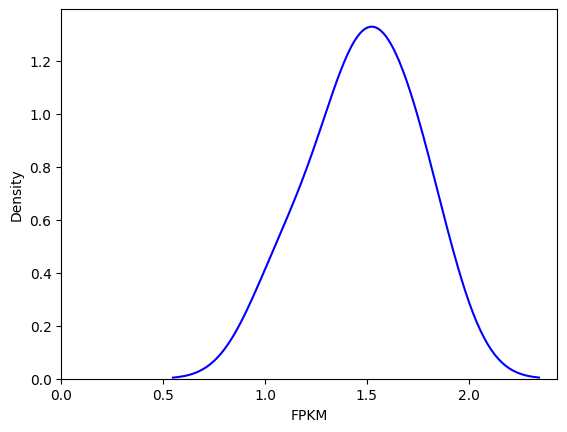

In [34]:
_202 = ds[ds['Transcript']==202]['FPKM']
pt = sns.kdeplot(_202, color = 'blue')
pt.set_xlim(xmin = 0)
pt

<Axes: xlabel='FPKM', ylabel='Density'>

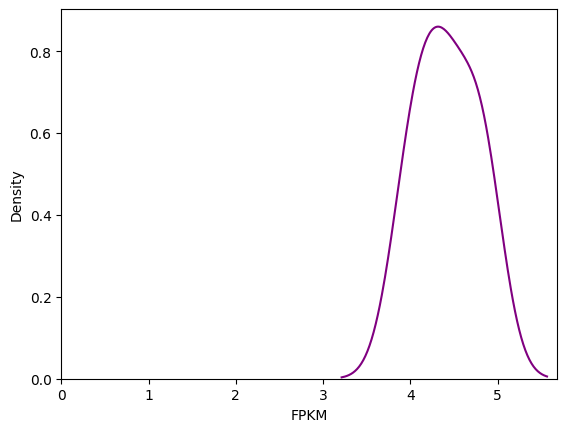

In [35]:
_203 = ds[ds['Transcript']==203]['FPKM']
pt = sns.kdeplot(_203, color = 'purple')
pt.set_xlim(xmin = 0)
pt

<Axes: xlabel='FPKM', ylabel='Density'>

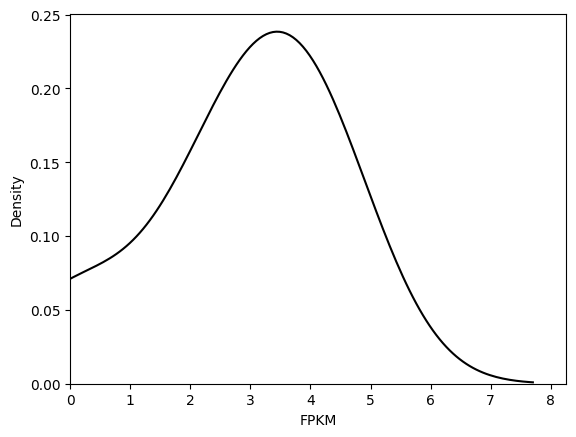

In [36]:
_205 = ds[ds['Transcript']==205]['FPKM']
pt = sns.kdeplot(_205, color = 'black')
pt.set_xlim(xmin = 0)
pt

In [40]:
dm = ds[ds['Transcript']==202]
dn = ds[ds['Transcript']==203]
db = ds[ds['Transcript']==205]

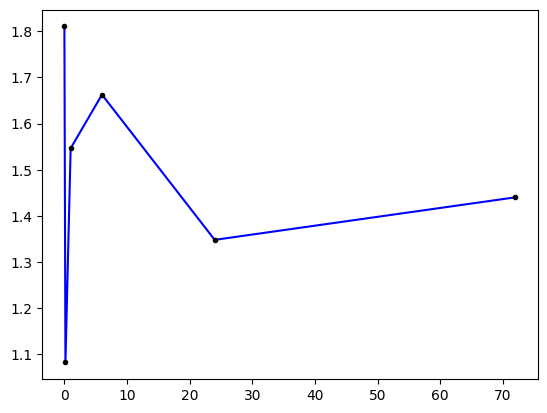

In [51]:
x1 = dm['Time']
y1 = dm['FPKM']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y1, x1,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='blue')
plt.plot(x1, y1, 'k.')

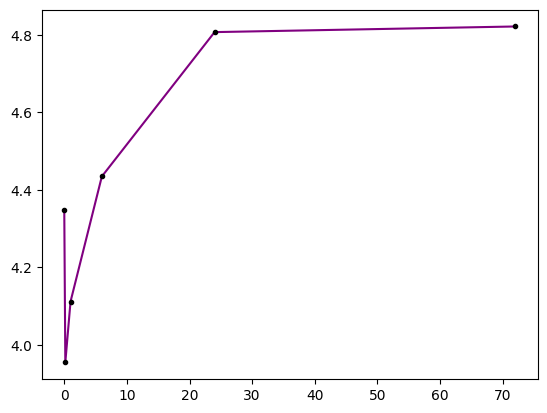

In [52]:
x2 = dn['Time']
y2 = dn['FPKM']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y2, x2,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='purple')
plt.plot(x2, y2, 'k.')

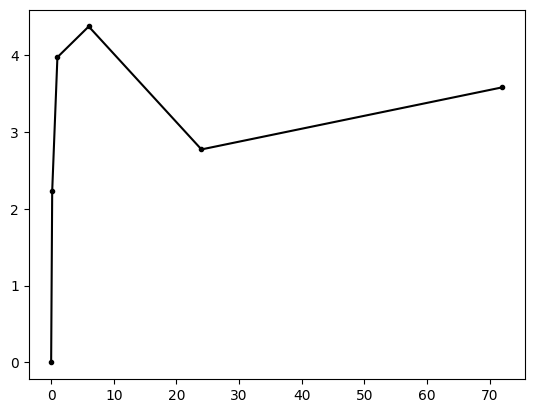

In [53]:
x3 = db['Time']
y3 = db['FPKM']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y3, x3,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='black')
plt.plot(x3, y3, 'k.')

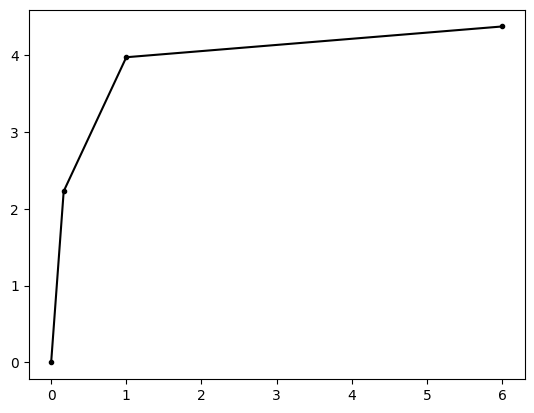

In [57]:
x3 = db[db['Time'] <= 6]['Time']
y3 = db[db['Time'] <= 6]['FPKM']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y3, x3,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='black')
plt.plot(x3, y3, 'k.')

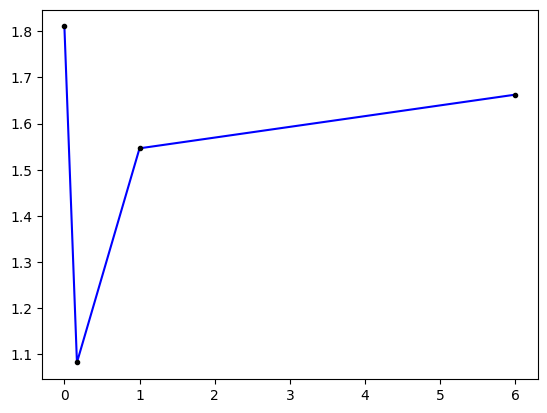

In [56]:
x1 = dm[dm['Time'] <= 6]['Time']
y1 = dm[dm['Time'] <= 6]['FPKM']

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
sm_x, sm_y = sm_lowess(y1, x1,  frac=0.2, 
                           it=5, return_sorted = True).T
plt.plot(sm_x, sm_y, color='blue')
plt.plot(x1, y1, 'k.')